<a href="https://colab.research.google.com/github/brainhack-school2020/Biosignal-Emotions-BHS-2020/blob/master/AffectiveMusicListeningEEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install PyBIDS
!pip install pybids
# Install DataLad to download the dataset "ds002721" from OpenNEURO (https://openneuro.org/datasets/ds002721/versions/1.0.1)
!pip install datalad

In [45]:
import datalad
!datalad install https://github.com/OpenNeuroDatasets/ds002721.git
!ls -aF
# You should now have the folder "ds002721/" installed

It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
./  ../  .config/  ds002721/  sample_data/


In [47]:
!ls -aF ds002721/

./			  .git/		    sub-04/  sub-11/  sub-18/  sub-25/
../			  .gitattributes    sub-05/  sub-12/  sub-19/  sub-26/
.bidsignore		  participants.tsv  sub-06/  sub-13/  sub-20/  sub-27/
CHANGES			  README	    sub-07/  sub-14/  sub-21/  sub-28/
code/			  sub-01/	    sub-08/  sub-15/  sub-22/  sub-29/
.datalad/		  sub-02/	    sub-09/  sub-16/  sub-23/  sub-30/
dataset_description.json  sub-03/	    sub-10/  sub-17/  sub-24/  sub-31/


In [67]:
import pandas as pd 
participants = pd.read_csv("ds002721/participants.tsv", delimiter='\t')
participants.head(len(participants))

,participant_id,age,sex
0,sub-01,31,M
1,sub-02,29,F
2,sub-03,39,F
3,sub-04,49,F
4,sub-05,23,F
5,sub-06,63,M
6,sub-07,34,M
7,sub-08,29,F
8,sub-09,36,F
9,sub-10,29,F


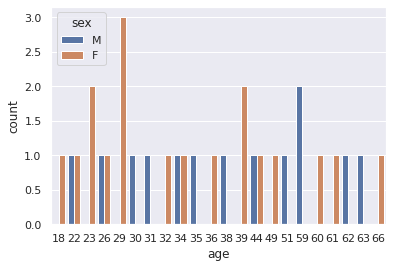

In [74]:
#import matplotlib.pyplot as plt
#plt.hist(participants['age'])
#plt.show()

import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="age", hue="sex",data=participants)

In [0]:
from IPython.display import display
subjects_list=["sub-01","sub-18","sub-05"]
tasks_list=["task-run1","task-run2","task-run3","task-run4","task-run5","task-run6"]

subjects_id=[]
channels=pd.DataFrame()
for subject in subjects_list:
  subjects_id.append(participants[participants['participant_id']==subject].index.values)
  for task in tasks_list:
    channels = (pd.DataFrame(pd.read_csv("ds002721/"+subject+"/eeg/"+subject+"_"+task+"_channels.tsv", delimiter='\t')))
    #display(channels.head(len(channels)))
    
    events = (pd.DataFrame(pd.read_csv("ds002721/"+subject+"/eeg/"+subject+"_"+task+"_events.tsv", delimiter='\t')))
    #display(events.head(len(channels)))

In [141]:
!pip install -U mne

     |████████████████████████████████| 6.6MB 2.6MB/s 


In [142]:
!pip install -U mne-bids

     |████████████████████████████████| 51kB 1.6MB/s 


In [167]:
# First let's try without BIDS

import mne
subjects_list=["sub-02"]
tasks_list=["task-run1"]#,"task-run2","task-run3","task-run4","task-run5","task-run6"]

#for subject in subjects_list:
#  subjects_id.append(participants[participants['participant_id']==subject].index.values)
#  for task in tasks_list:
     # raw = mne.io.read_raw_edf("ds002721/"+subject+"/eeg/"+subject+"_"+task+"_eeg.edf")
     # display(len(raw))
display(os.path.isfile("ds002721/"+subject+"/eeg/"+subject+"_"+task+"_channels.tsv"))
display(os.path.isfile("ds002721/"+subject+"/eeg/"+subject+"_"+task+"_eeg.edf"))
display(os.path.isfile("ds002721/"+subject+"/eeg/"+subject+"_"+task+"_eeg.json"))
display(os.path.isfile("ds002721/"+subject+"/eeg/"+subject+"_"+task+"_events.json"))
display(os.path.isfile("ds002721/"+subject+"/eeg/"+subject+"_"+task+"_events.tsv"))

True

False

True

True

True

In [168]:
!ls -aF ds002721/sub-01/eeg/

# Problem here : The .edf files are inaccessible (e.g. "sub-01_task-run1_eeg.edf" comes as a "sub-01_task-run1_eeg.edf@")

./			       sub-01_task-run3_events.tsv
../			       sub-01_task-run4_channels.tsv
sub-01_task-run1_channels.tsv  sub-01_task-run4_eeg.edf@
sub-01_task-run1_eeg.edf@      sub-01_task-run4_eeg.json
sub-01_task-run1_eeg.json      sub-01_task-run4_events.json
sub-01_task-run1_events.json   sub-01_task-run4_events.tsv
sub-01_task-run1_events.tsv    sub-01_task-run5_channels.tsv
sub-01_task-run2_channels.tsv  sub-01_task-run5_eeg.edf@
sub-01_task-run2_eeg.edf@      sub-01_task-run5_eeg.json
sub-01_task-run2_eeg.json      sub-01_task-run5_events.json
sub-01_task-run2_events.json   sub-01_task-run5_events.tsv
sub-01_task-run2_events.tsv    sub-01_task-run6_channels.tsv
sub-01_task-run3_channels.tsv  sub-01_task-run6_eeg.edf@
sub-01_task-run3_eeg.edf@      sub-01_task-run6_eeg.json
sub-01_task-run3_eeg.json      sub-01_task-run6_events.json
sub-01_task-run3_events.json   sub-01_task-run6_events.tsv
